In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly



In [2]:
# =============================
# DATA CLEANING
# =============================
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

print("First 5 rows:")
display(df.head())

print("\nMissing values:")
print(df.isnull().sum())

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop(columns='Cabin', inplace=True)

# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Standardize numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Age','Fare','SibSp','Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nCleaned Data:")
display(df.head())


First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2776525095.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2776525095.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


Cleaned Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,0.432793,-0.473674,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,-0.474545,-0.473674,373450,-0.486337,False,True


Summary Statistics:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,2.308642,0.352413,2.272780e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,257.353842,0.486592,0.836071,0.477990,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,1.000000,0.000000,1.000000,0.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,223.500000,0.000000,2.000000,0.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,668.500000,1.000000,3.000000,1.000000,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,891.000000,1.000000,3.000000,1.000000,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00


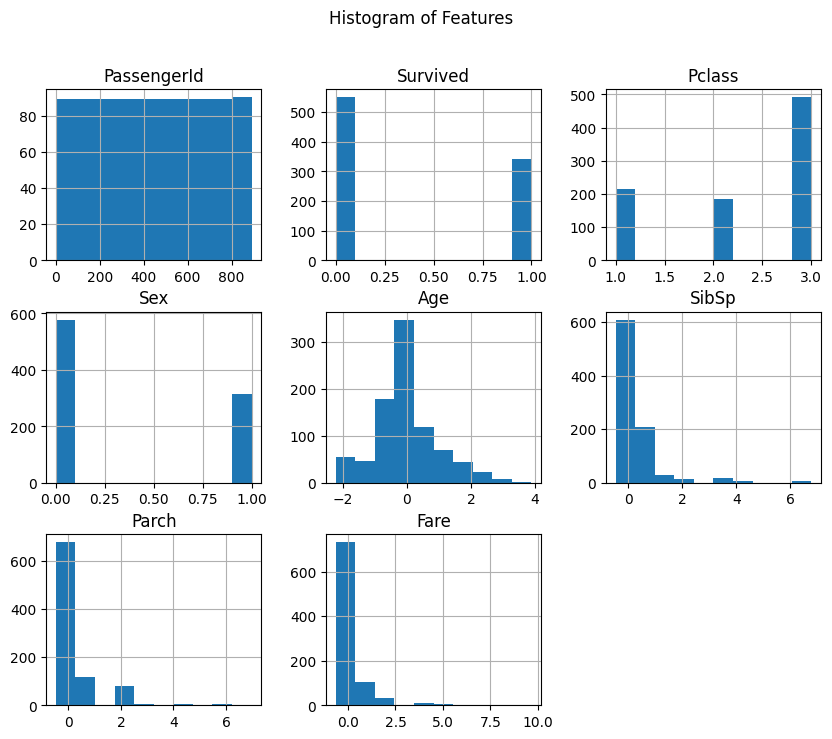

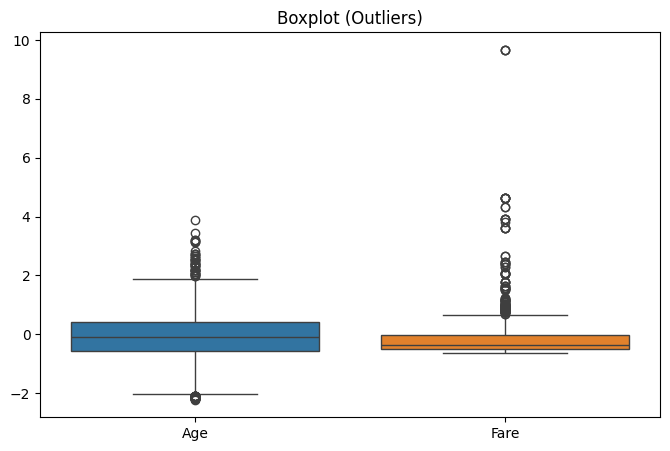

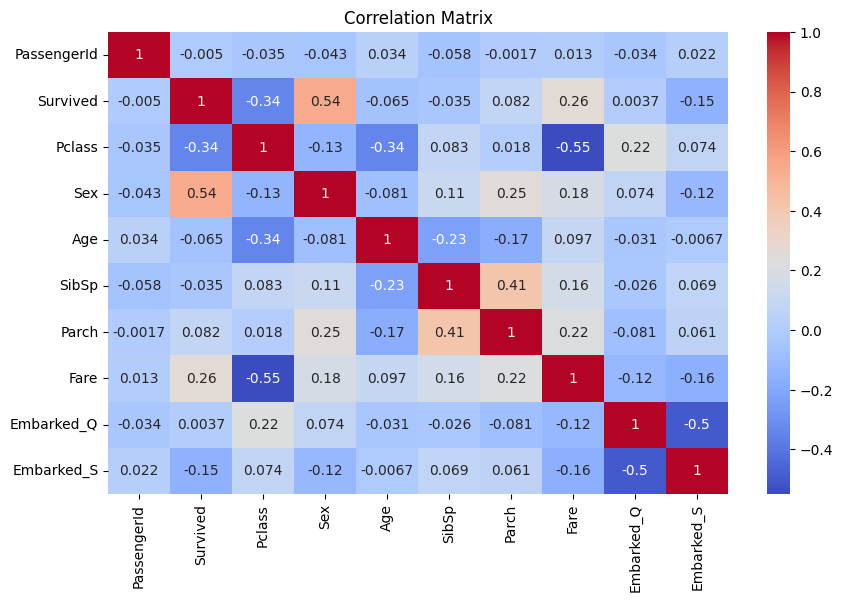

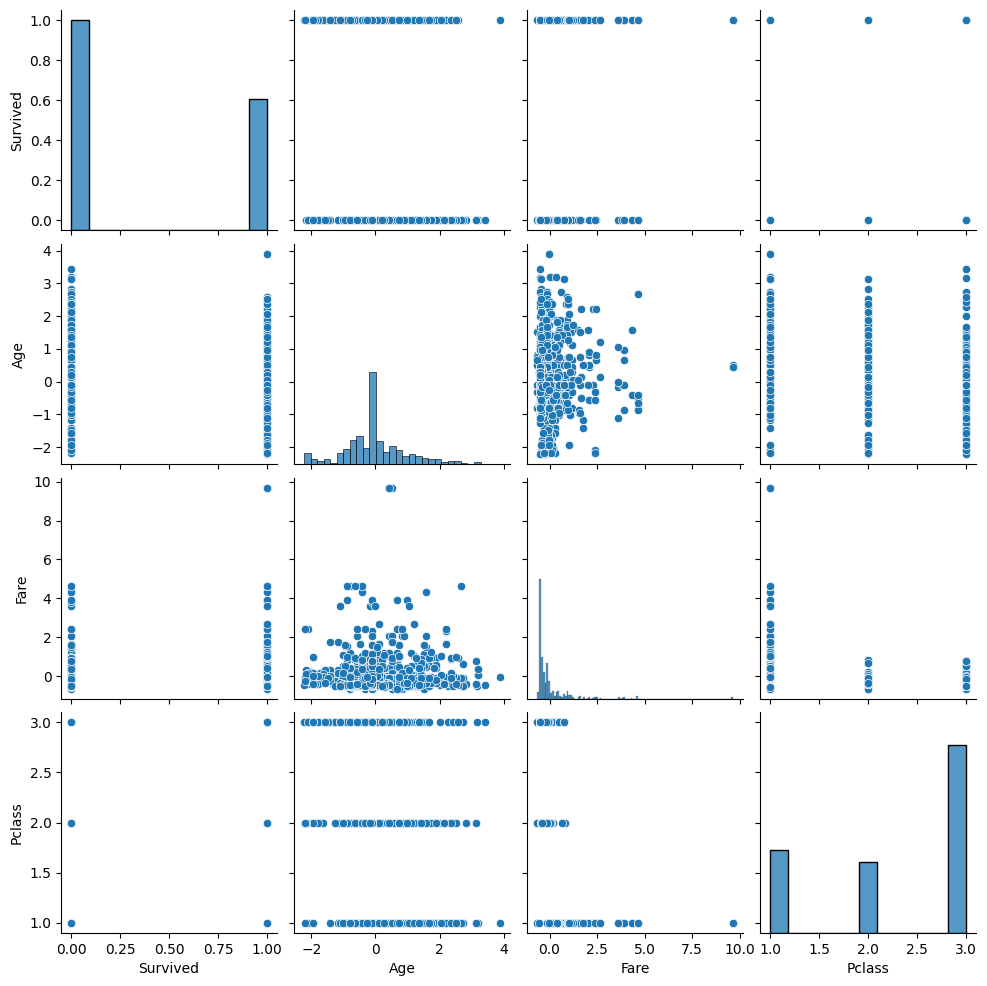

In [3]:
# =============================
# EXPLORATORY DATA ANALYSIS
# =============================
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary Statistics:")
display(df.describe())

# Histogram
df.hist(figsize=(10,8))
plt.suptitle("Histogram of Features")
plt.show()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Boxplot (Outliers)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df[['Survived','Age','Fare','Pclass']])
plt.show()


In [4]:
df.to_csv("Cleaned_Titanic.csv", index=False)
print("✅ Cleaned dataset saved")


✅ Cleaned dataset saved


In [5]:
from google.colab import files
files.download("Cleaned_Titanic.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>